<a href="https://colab.research.google.com/github/KabichNeu/StockMarketPrediction/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#newdata after mining
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
import io
import pandas as pd
stockdata = pd.read_csv(io.BytesIO(uploaded['data.csv']), index_col = 0)

In [ ]:
stockdata

Date   open   high  ...       MACD         CCI         ADX
0     2012-01-01  873.0  879.0  ...   0.000000         NaN         NaN
1     2012-01-02  879.0  913.0  ...   0.471154   66.666667  100.000000
2     2012-01-03  900.0  916.0  ...   0.352264   54.237288  100.000000
3     2012-01-04  892.0  875.0  ...  -0.685267  -84.313725   67.623618
4     2012-01-05  865.0  875.0  ...  -1.513166  -59.581320   52.310464
...          ...    ...    ...  ...        ...         ...         ...
1905  2020-03-16  741.0  764.0  ...   7.924927 -124.141364   26.345841
1906  2020-03-17  765.0  765.0  ...   1.680259 -115.728978   29.561957
1907  2020-03-18  731.0  739.0  ...  -4.507789 -120.879121   33.988905
1908  2020-03-19  701.0  740.0  ...  -8.108023 -101.120479   38.117933
1909  2020-03-22  744.0  744.0  ... -13.149710  -97.213115   39.894882

[1910 rows x 10 columns]

In [ ]:
import numpy as np
stockdata['CL-OP'] = stockdata['close'] - stockdata['open']
stockdata['Class'] = np.where(stockdata['CL-OP'] > 0, 'UP', 'DOWN')

In [ ]:
stockdata['Date'] = pd.to_datetime(stockdata['Date'],format = '%Y/%m/%d')

In [ ]:
stockdata = stockdata.drop(0)

In [ ]:
stockdata

Date   open   high    low  ...         CCI         ADX  CL-OP  Class
1    2012-01-02  879.0  913.0  882.0  ...   66.666667  100.000000   21.0     UP
2    2012-01-03  900.0  916.0  892.0  ...   54.237288  100.000000   -8.0   DOWN
3    2012-01-04  892.0  875.0  842.0  ...  -84.313725   67.623618  -27.0   DOWN
4    2012-01-05  865.0  875.0  858.0  ...  -59.581320   52.310464   -7.0   DOWN
5    2012-01-08  858.0  845.0  814.0  ... -141.040462   54.601490  -28.0   DOWN
...         ...    ...    ...    ...  ...         ...         ...    ...    ...
1905 2020-03-16  741.0  764.0  723.0  ... -124.141364   26.345841    9.0     UP
1906 2020-03-17  765.0  765.0  721.0  ... -115.728978   29.561957  -34.0   DOWN
1907 2020-03-18  731.0  739.0  700.0  ... -120.879121   33.988905  -16.0   DOWN
1908 2020-03-19  701.0  740.0  690.0  ... -101.120479   38.117933   29.0     UP
1909 2020-03-22  744.0  744.0  700.0  ...  -97.213115   39.894882  -43.0   DOWN

[1909 rows x 12 columns]

In [ ]:
stockdata = stockdata.reset_index()

In [ ]:
stockdata

index       Date   open   high  ...         CCI         ADX  CL-OP  Class
0         1 2012-01-02  879.0  913.0  ...   66.666667  100.000000   21.0     UP
1         2 2012-01-03  900.0  916.0  ...   54.237288  100.000000   -8.0   DOWN
2         3 2012-01-04  892.0  875.0  ...  -84.313725   67.623618  -27.0   DOWN
3         4 2012-01-05  865.0  875.0  ...  -59.581320   52.310464   -7.0   DOWN
4         5 2012-01-08  858.0  845.0  ... -141.040462   54.601490  -28.0   DOWN
...     ...        ...    ...    ...  ...         ...         ...    ...    ...
1904   1905 2020-03-16  741.0  764.0  ... -124.141364   26.345841    9.0     UP
1905   1906 2020-03-17  765.0  765.0  ... -115.728978   29.561957  -34.0   DOWN
1906   1907 2020-03-18  731.0  739.0  ... -120.879121   33.988905  -16.0   DOWN
1907   1908 2020-03-19  701.0  740.0  ... -101.120479   38.117933   29.0     UP
1908   1909 2020-03-22  744.0  744.0  ...  -97.213115   39.894882  -43.0   DOWN

[1909 rows x 13 columns]

In [ ]:
stockdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1909 entries, 0 to 1908
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   1909 non-null   int64         
 1   Date    1909 non-null   datetime64[ns]
 2   open    1909 non-null   float64       
 3   high    1909 non-null   float64       
 4   low     1909 non-null   float64       
 5   close   1909 non-null   float64       
 6   vol     1909 non-null   int64         
 7   RSI     1909 non-null   float64       
 8   MACD    1909 non-null   float64       
 9   CCI     1909 non-null   float64       
 10  ADX     1909 non-null   float64       
 11  CL-OP   1909 non-null   float64       
 12  Class   1909 non-null   object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(1)
memory usage: 194.0+ KB


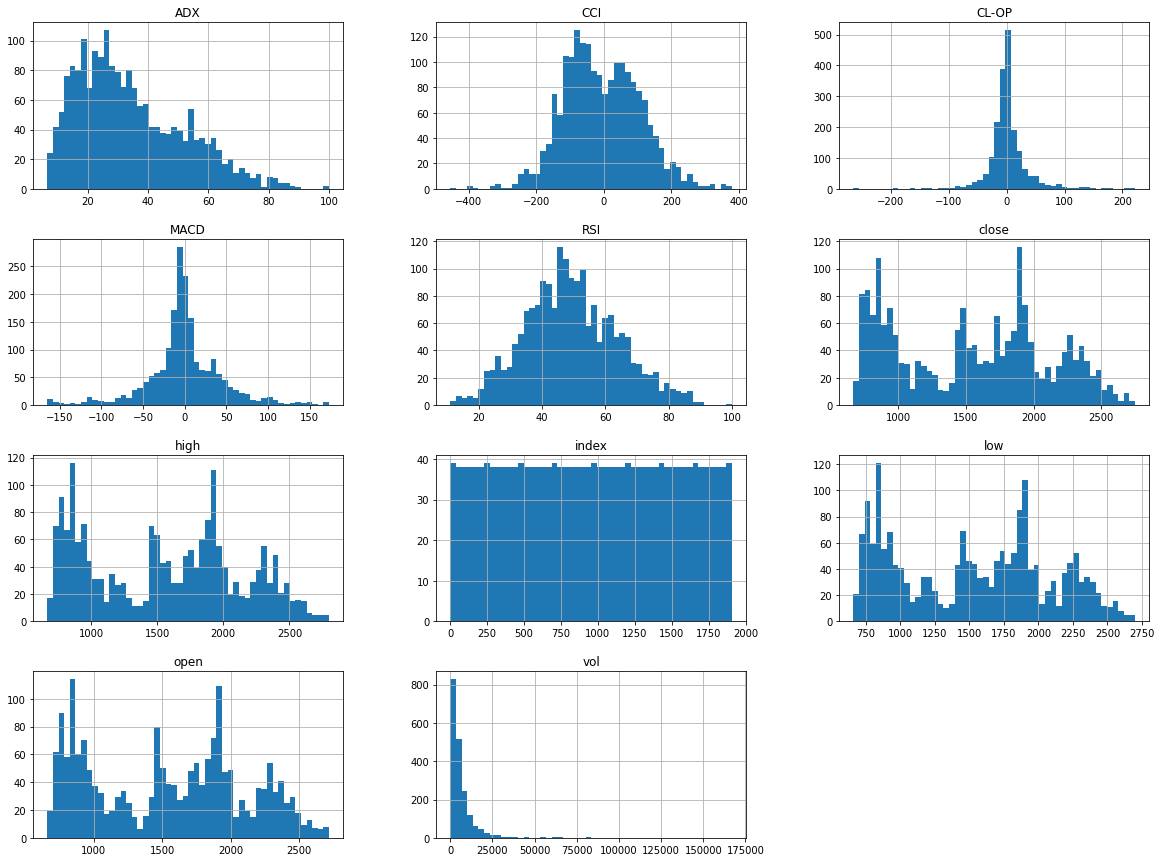

In [ ]:
#visualizing individual data of the datasets
import matplotlib.pyplot as plt
stockdata.hist(bins = 50 , figsize = (20,15) )
plt.show()

In [ ]:
stockdata.describe(include = 'all')

index                 Date  ...        CL-OP  Class
count   1909.000000                 1909  ...  1909.000000   1909
unique          NaN                 1900  ...          NaN      2
top             NaN  2015-06-08 00:00:00  ...          NaN   DOWN
freq            NaN                    3  ...          NaN   1099
first           NaN  2012-01-02 00:00:00  ...          NaN    NaN
last            NaN  2020-03-22 00:00:00  ...          NaN    NaN
mean     955.000000                  NaN  ...     0.695128    NaN
std      551.225151                  NaN  ...    32.278211    NaN
min        1.000000                  NaN  ...  -265.000000    NaN
25%      478.000000                  NaN  ...   -11.000000    NaN
50%      955.000000                  NaN  ...    -1.000000    NaN
75%     1432.000000                  NaN  ...    10.000000    NaN
max     1909.000000                  NaN  ...   222.000000    NaN

[13 rows x 13 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f91f2505080>,
      dtype=object)

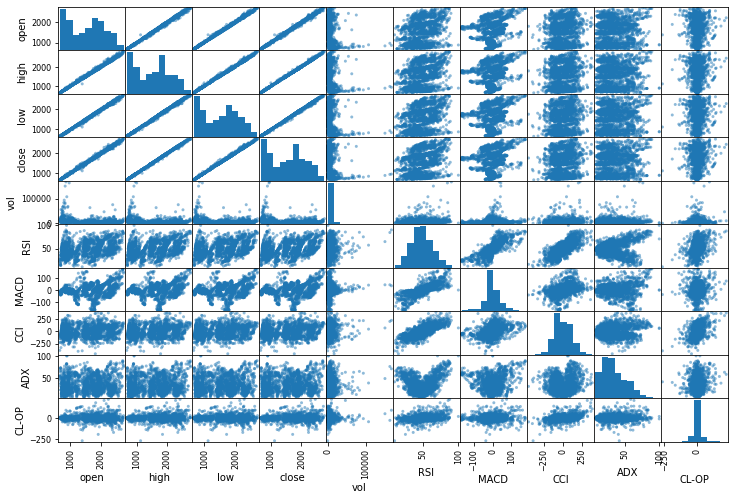

In [ ]:
#finding the correlation
attributes = ["open","high","low","close","vol","RSI","MACD","CCI","ADX","CL-OP"]
from matplotlib import cm
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
scatter_matrix(stockdata[attributes], figsize=(12, 8))

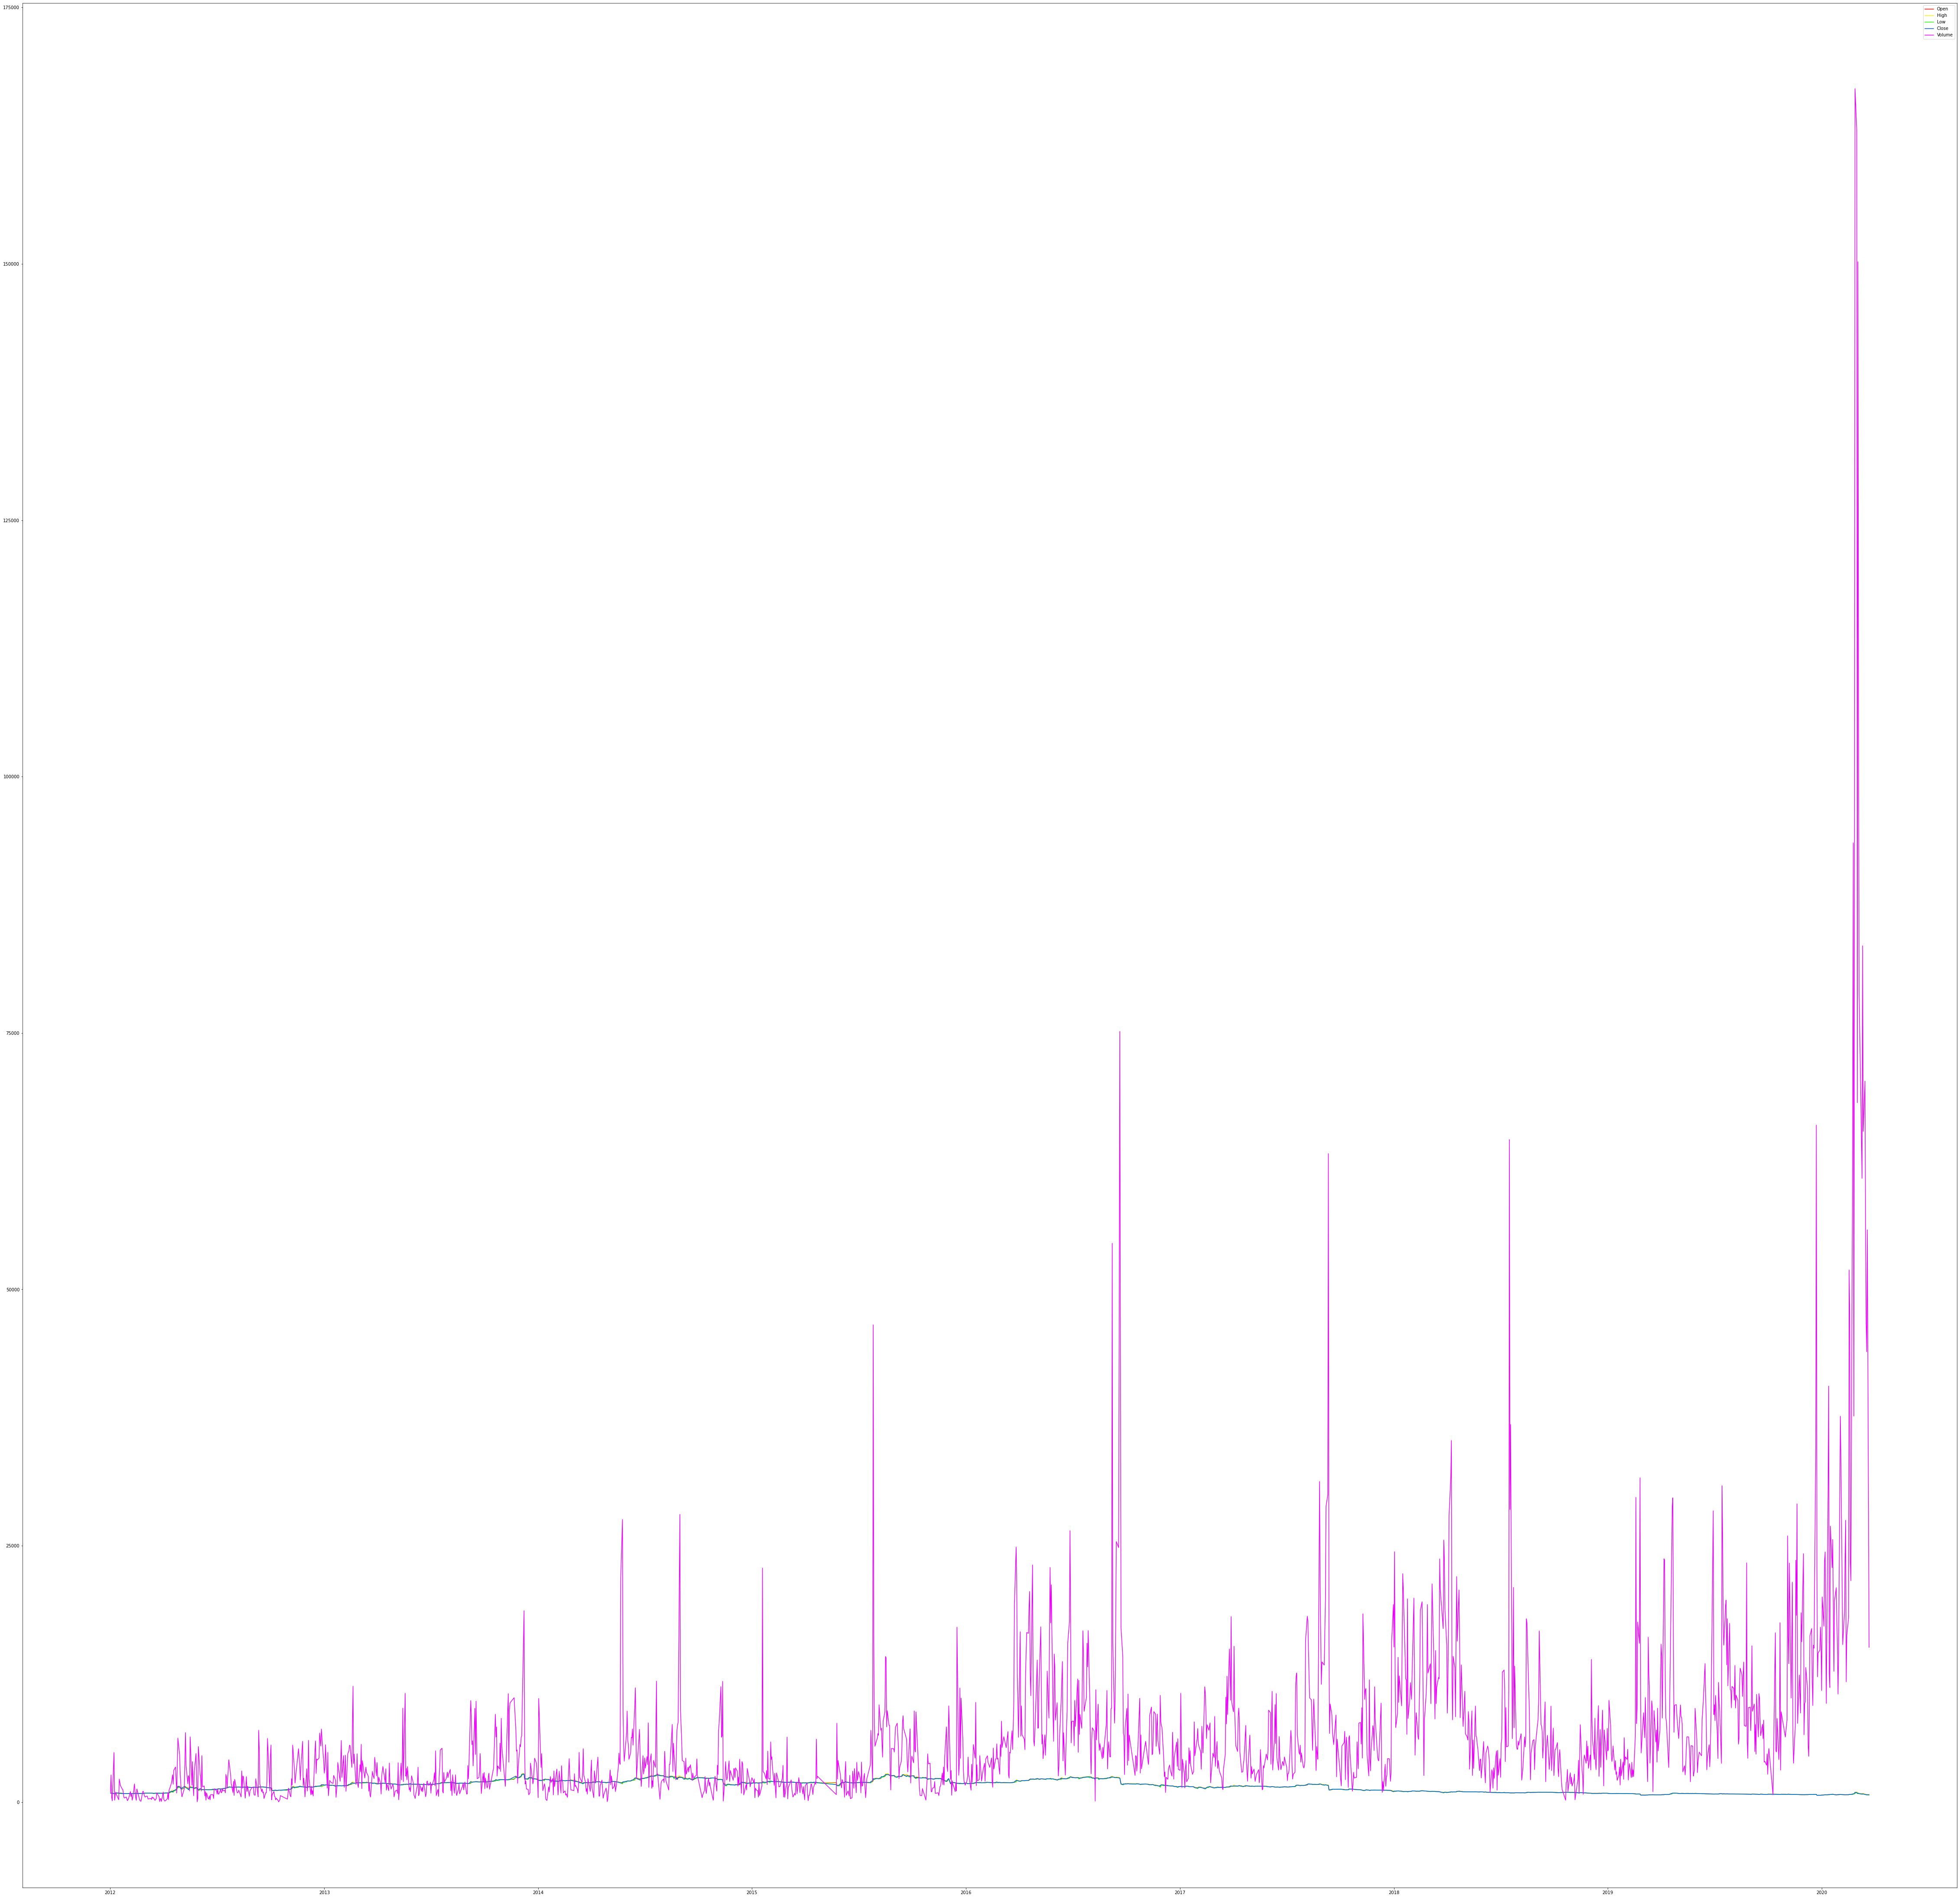

In [ ]:
def visualizing_ohlc():
  df = stockdata.set_index('Date')
  plt.figure(figsize=(80,80))
  plt.plot(df['open'], '#fc0800', label='Open')
  plt.plot(df['high'], '#fcf400', label="High")
  plt.plot(df['low'], '#1dfc00', label="Low")
  plt.plot(df['close'], '#0058fc', label="Close")
  plt.plot(df['vol'], '#eb00fc', label="Volume")
  plt.legend() 
  plt.show()
visualizing_ohlc()

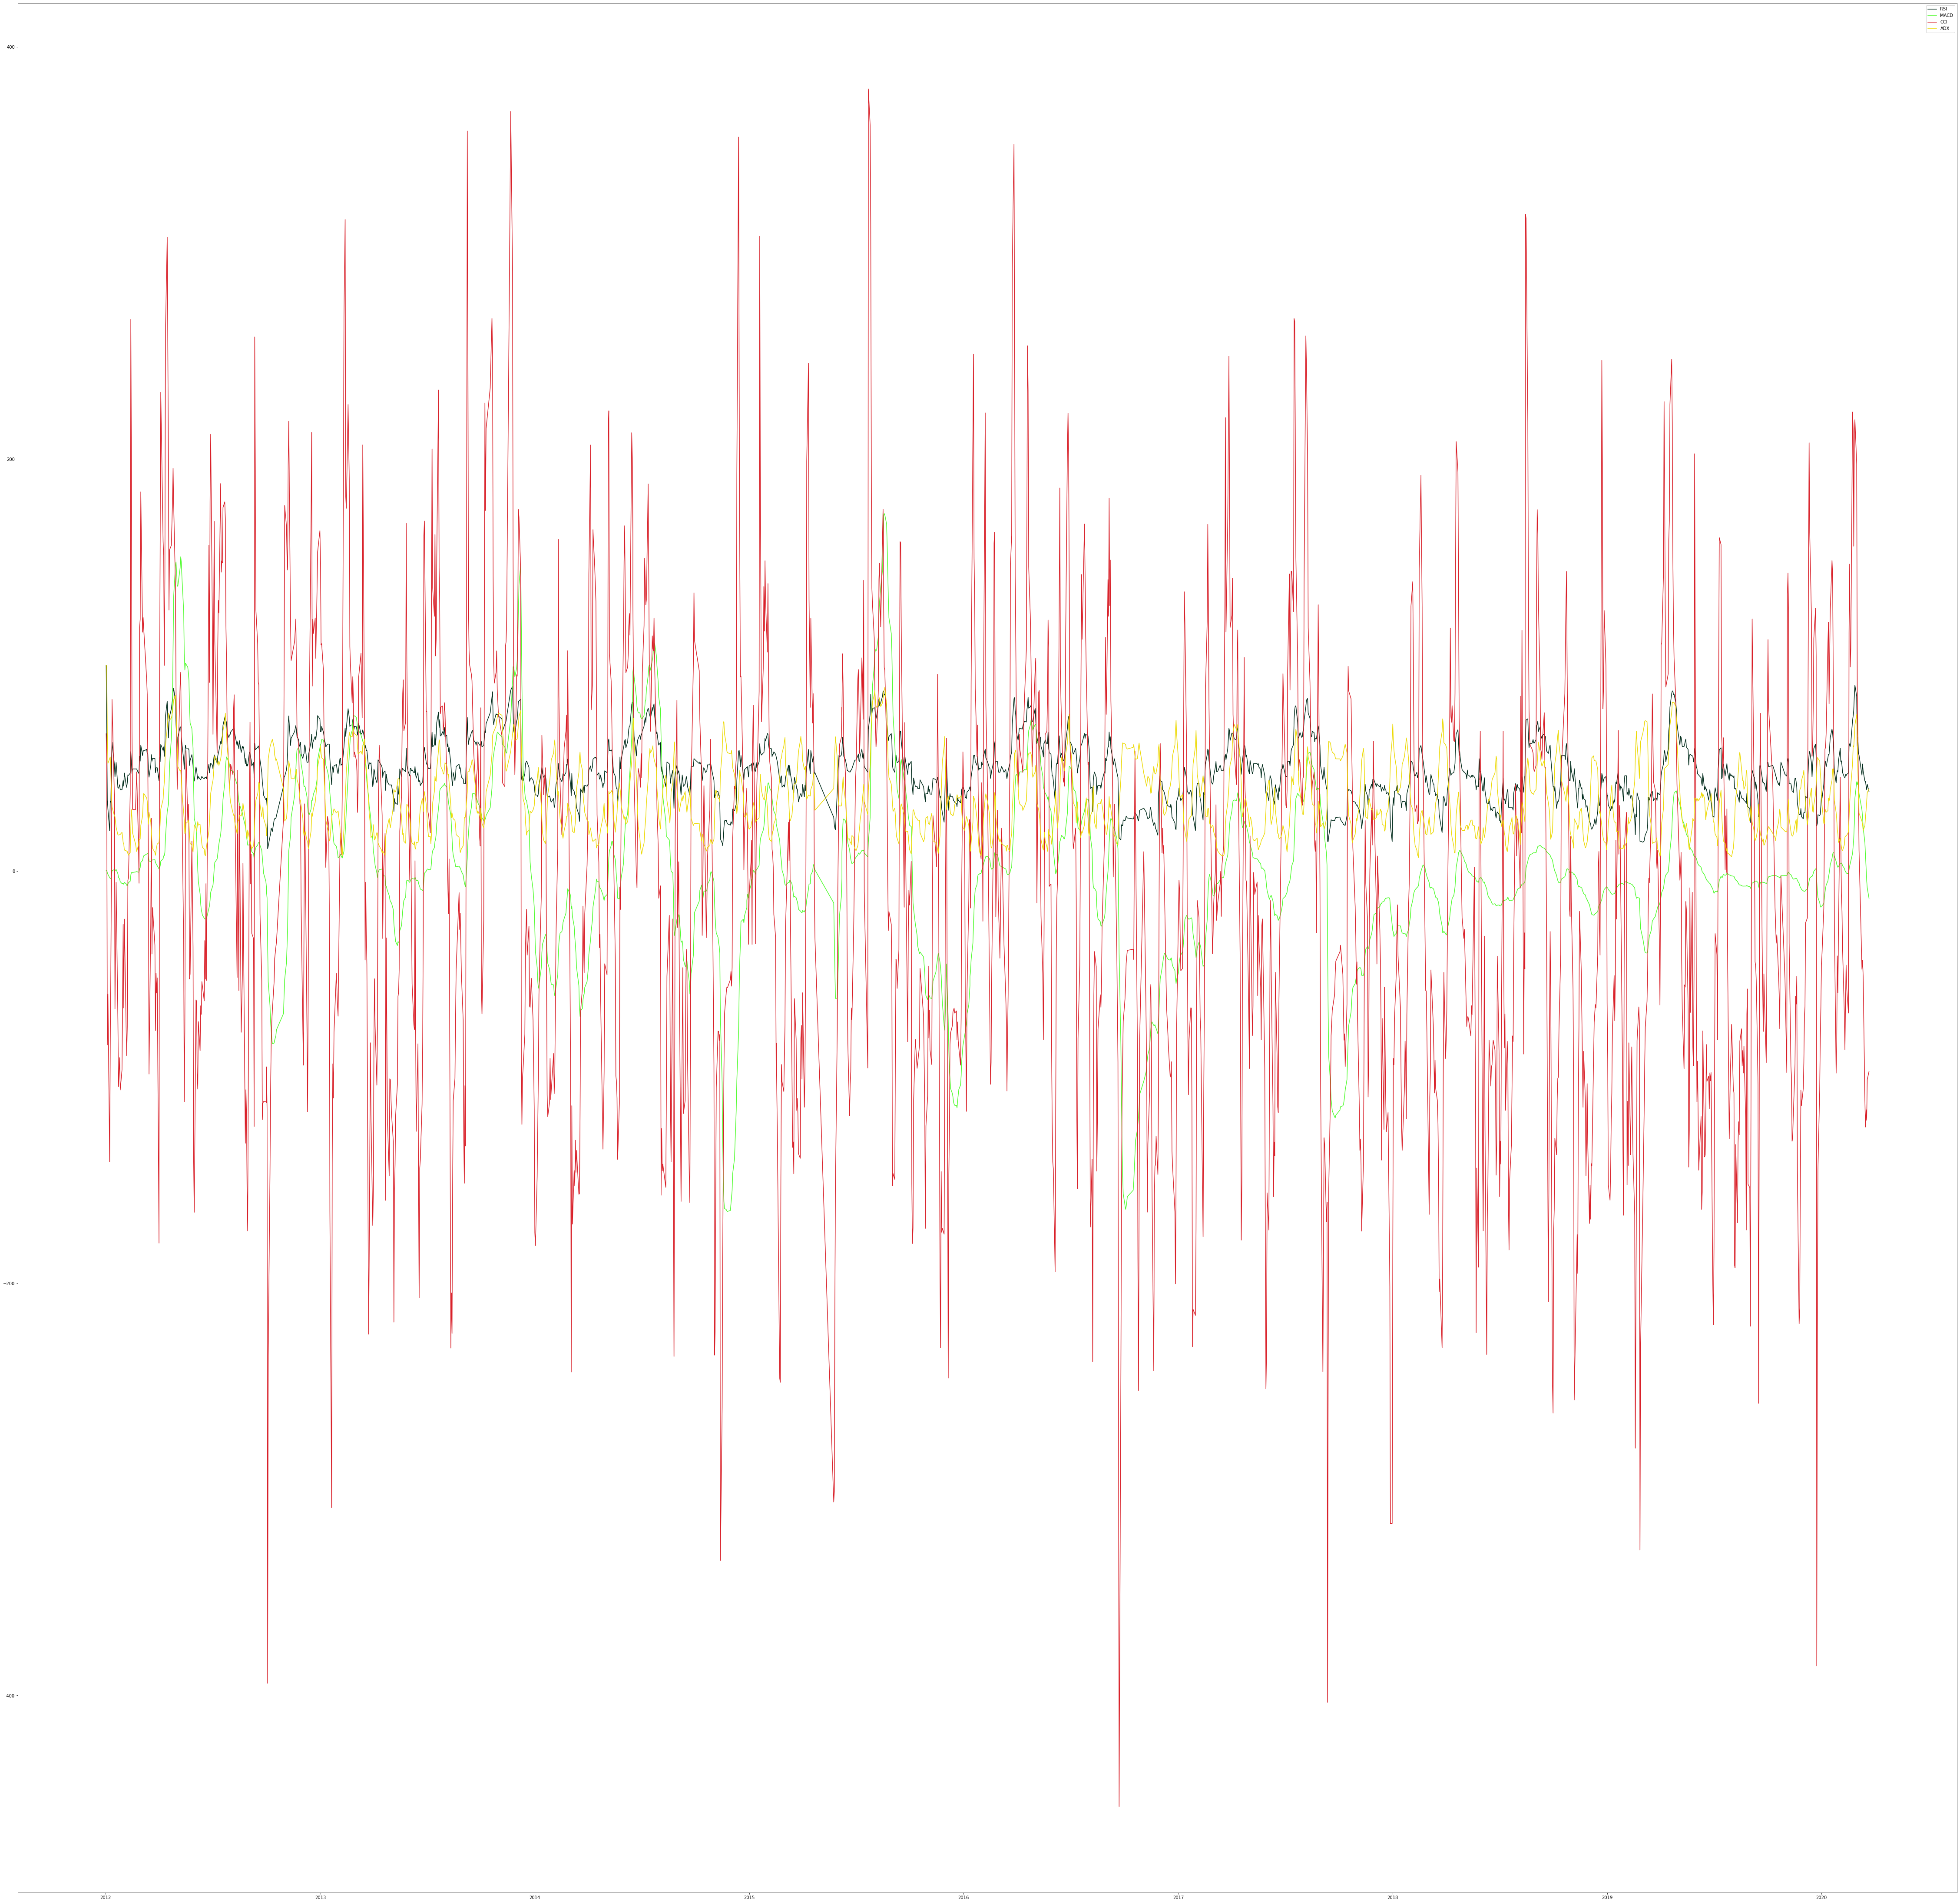

In [ ]:
def visualizing_indicators():
  df = stockdata.set_index('Date')
  plt.figure(figsize=(80,80))
  plt.plot(df['RSI'], '#012b1b', label="RSI")
  plt.plot(df['MACD'], '#52fc30', label="MACD")
  plt.plot(df['CCI'], '#d9212a', label="CCI")
  plt.plot(df['ADX'], '#edda07', label="ADX")
  plt.legend() 
  plt.show()
visualizing_indicators()

Accuracy of Decision Tree on the training set: 0.71
Accuracy of Decision Tree classifier on test set: 0.69


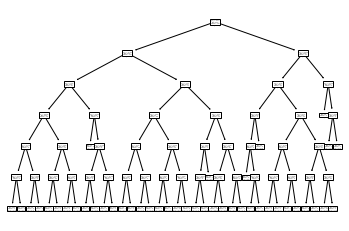

In [ ]:


def decision_Tree(data):
  from sklearn.tree import DecisionTreeClassifier, plot_tree
  from sklearn.model_selection import train_test_split

  X_train, X_test, y_train,y_test = train_test_split(data[['RSI','MACD','CCI','ADX']],data['Class'], test_size = 0.25, shuffle = False)
  tree_clf = DecisionTreeClassifier(max_depth = 6)
  tree_clf.fit(X_train, y_train)
  print('Accuracy of Decision Tree on the training set: {:.2f}'.format(tree_clf.score(X_train, y_train)))
  print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(tree_clf.score(X_test, y_test)))

  #for visualizing decision tree
  plot_tree(tree_clf)
  

decision_Tree(stockdata)

In [ ]:
'''def SVM_implementation(data):
  from sklearn.pipeline import Pipeline
  from sklearn.preprocessing import StandardScaler
  from sklearn.svm import LinearSVC , SVC
  from sklearn.model_selection import train_test_split

  X_train, X_test, y_train,y_test = train_test_split(data[['RSI','MACD','CCI','ADX']],data['Class'], test_size = 0.25, shuffle = False)

  svm_clf = Pipeline((
      ("scaler", StandardScaler()),
      ("linear_svc", LinearSVC(C=1, loss ="hinge")),
  ))
  svm_clf.fit(X_train, y_train)

  polynomial_svm_clf = Pipeline((
      ("poly_features", PolynomialFeatures(degree = 3)),
      ("scaler", StandardScaler()),
      ("svm_clf", LinearSVC(C =10, loss = "hinge"))
  ))
  polynomial_svm_clf.fit(X_train, y_train)

  poly_kernel_svm_clf = Pipeline((
                        ("scaler", StandardScaler()),
                        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
  ))
  poly_kernel_svm_clf.fit(X, y)

SVM_implementation(stockdata) '''


'def SVM_implementation(data):\n  from sklearn.pipeline import Pipeline\n  from sklearn.preprocessing import StandardScaler\n  from sklearn.svm import LinearSVC , SVC\n  from sklearn.model_selection import train_test_split\n\n  X_train, X_test, y_train,y_test = train_test_split(data[[\'RSI\',\'MACD\',\'CCI\',\'ADX\']],data[\'Class\'], test_size = 0.25, shuffle = False)\n\n  svm_clf = Pipeline((\n      ("scaler", StandardScaler()),\n      ("linear_svc", LinearSVC(C=1, loss ="hinge")),\n  ))\n  svm_clf.fit(X_train, y_train)\n\n  polynomial_svm_clf = Pipeline((\n      ("poly_features", PolynomialFeatures(degree = 3)),\n      ("scaler", StandardScaler()),\n      ("svm_clf", LinearSVC(C =10, loss = "hinge"))\n  ))\n  polynomial_svm_clf.fit(X_train, y_train)\n\n  poly_kernel_svm_clf = Pipeline((\n                        ("scaler", StandardScaler()),\n                        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))\n  ))\n  poly_kernel_svm_clf.fit(X, y)\n\nSVM_implementation(st

In [ ]:
def SVM()